**Breakout rooms #1st practice**



Load the data gtky and run the part where one_hot encoding is performed.

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
gtky = pd.read_csv('ds4400_clean_gtky.csv')
gtky.head()

,class,cs_ds,co_op,credit_hours,work_hours
0,Senior,DS,Yes,17,12
1,Sophomore,CS,No,17,0
2,Senior,DS,No,17,15
3,Senior,CS,Yes,16,3
4,Junior,CS,No,16,0


In [3]:
gtky

,class,cs_ds,co_op,credit_hours,work_hours
0,Senior,DS,Yes,17,12
1,Sophomore,CS,No,17,0
2,Senior,DS,No,17,15
3,Senior,CS,Yes,16,3
4,Junior,CS,No,16,0
5,Junior,CY,No,17,0
6,Junior,CS,Yes,12,5
7,Senior,DS,Yes,16,25
8,Senior,CS,Yes,12,8
9,Junior,CS,Yes,17,0


In [4]:
# note that it will make the "baseline" category the first alphabetical value
# Notice: Normally, pd.get_dummies(df['class']) would create three dummy columns.
# Here it will do one column for senior, another for sophomore and another for
# junior. But if we write drop_first=True, it drops the first column that appears
# alphabetically. That one is junior. So below it does not appear.
onehot_class = pd.get_dummies(gtky['class'], drop_first=True, dtype = int)
onehot_class.head()

,Senior,Sophomore
0,1,0
1,0,1
2,1,0
3,1,0
4,0,0


In [5]:
# do it for the full data set
# doing the same as above but for any column that has categorical variables
onehot_gtky = pd.get_dummies(gtky, drop_first=True, dtype = int)
onehot_gtky.head()

,credit_hours,work_hours,class_Senior,class_Sophomore,cs_ds_CY,cs_ds_DS,co_op_Yes
0,17,12,1,0,0,1,1
1,17,0,0,1,0,0,0
2,17,15,1,0,0,1,0
3,16,3,1,0,0,0,1
4,16,0,0,0,0,0,0


In [6]:
# turn it into a numpy array for ML purposes
onehotnp_gtky = onehot_gtky.to_numpy()
onehotnp_gtky

array([[17, 12,  1,  0,  0,  1,  1],
       [17,  0,  0,  1,  0,  0,  0],
       [17, 15,  1,  0,  0,  1,  0],
       [16,  3,  1,  0,  0,  0,  1],
       [16,  0,  0,  0,  0,  0,  0],
       [17,  0,  0,  0,  1,  0,  0],
       [12,  5,  0,  0,  0,  0,  1],
       [16, 25,  1,  0,  0,  1,  1],
       [12,  8,  1,  0,  0,  0,  1],
       [17,  0,  0,  0,  0,  0,  1],
       [18,  0,  0,  0,  0,  1,  0],
       [17,  0,  1,  0,  0,  1,  0],
       [16,  5,  0,  0,  0,  0,  1],
       [18,  0,  1,  0,  0,  0,  1],
       [16, 12,  1,  0,  0,  0,  1],
       [17, 15,  0,  0,  0,  0,  1],
       [16,  0,  1,  0,  0,  0,  0],
       [16,  0,  0,  0,  0,  1,  0],
       [18, 10,  1,  0,  0,  0,  1],
       [16, 10,  1,  0,  0,  0,  1],
       [17, 10,  0,  0,  0,  0,  0],
       [16,  0,  1,  0,  0,  0,  1],
       [16, 20,  0,  0,  0,  1,  0],
       [17,  0,  0,  0,  0,  0,  0],
       [17, 20,  0,  0,  0,  1,  1],
       [16,  0,  1,  0,  0,  1,  1],
       [18,  0,  0,  1,  0,  0,  0]])

**Breakout rooms: 2nd practice**

Practice of the standarization of data

In [7]:
# Standardization (data centering and scaling)
from sklearn import preprocessing

X = np.array([[1, 1, 1000],
              [2, 2, 850],
              [2, 3, 1400],
              [1, 1, 800],
              [4, 2, 1050]])
X

array([[   1,    1, 1000],
       [   2,    2,  850],
       [   2,    3, 1400],
       [   1,    1,  800],
       [   4,    2, 1050]])

In [8]:
X = preprocessing.scale(X)
# Uses sklearn.preprocessing.scale to scale the data using centering (as described in the slides)
X

array([[-0.91287093, -1.06904497, -0.09470274],
       [ 0.        ,  0.26726124, -0.80497333],
       [ 0.        ,  1.60356745,  1.79935215],
       [-0.91287093, -1.06904497, -1.04173019],
       [ 1.82574186,  0.26726124,  0.14205412]])

In [9]:
# check our hand-math from the slides for x11*
-np.sqrt(5/6)

np.float64(-0.9128709291752769)

In [10]:
# check that our data now have mean 0 and sd 1 for all columns
np.mean(X, axis=0)

array([ 0.00000000e+00, -8.88178420e-17,  3.33066907e-17])

In [11]:
np.std(X, axis=0)

array([1., 1., 1.])

In [12]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler does the min-max scaling as explained in the slides

X = onehotnp_gtky
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X).round(2)
X_scale

array([[0.83, 0.48, 1.  , 0.  , 0.  , 1.  , 1.  ],
       [0.83, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.83, 0.6 , 1.  , 0.  , 0.  , 1.  , 0.  ],
       [0.67, 0.12, 1.  , 0.  , 0.  , 0.  , 1.  ],
       [0.67, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.83, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.67, 1.  , 1.  , 0.  , 0.  , 1.  , 1.  ],
       [0.  , 0.32, 1.  , 0.  , 0.  , 0.  , 1.  ],
       [0.83, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.83, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  ],
       [0.67, 0.2 , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ],
       [0.67, 0.48, 1.  , 0.  , 0.  , 0.  , 1.  ],
       [0.83, 0.6 , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.67, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.67, 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.4 , 1.  , 0.  , 0.  , 0.  , 1.  ],
       [0.67, 0.4 , 1.  , 0.  ,

**Breakout rooms: 3rd practice**

In [13]:
# Showing gradient descent vs closed-form regression
Phi = np.array([[1, 1],
                [2, 1],
                [4, 1]])
y = np.array([[9],
              [12],
              [20]])

In [14]:
# gradient descent
w_gd = np.array([[1],[1]])
eta = 0.1
n = Phi.shape[0]

def f(w):
	p = (np.dot(Phi,w) - y)
	return (1/n)*np.dot(np.transpose(p), p).item()

f_value_list = []
w1_list = []
w2_list = []
for i in range(100):
    df = (2/n)*Phi.T.dot(Phi.dot(w_gd) - y)
    w_gd = w_gd - eta*df
    w1_list.append(w_gd[0])
    w2_list.append(w_gd[1])
    f_value_list.append(f(w_gd))

In [15]:
print('Best w = \n', w_gd)

Best w = 
 [[3.73037236]
 [4.95311488]]


In [16]:
# closed-form
w = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), np.dot(Phi.T, y))
w

array([[3.71428571],
       [5.        ]])

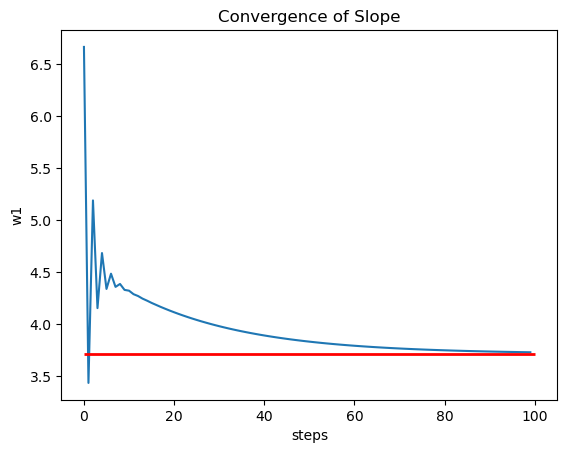

In [17]:
import matplotlib.pyplot as plt
# show gradient descent converging to the closed-form
plt.plot(w1_list)
plt.title('Convergence of Slope')
plt.xlabel('steps')
plt.ylabel('w1')
plt.hlines(y=w[0], xmin=0, xmax=100, linewidth=2, color='r')
plt.show()

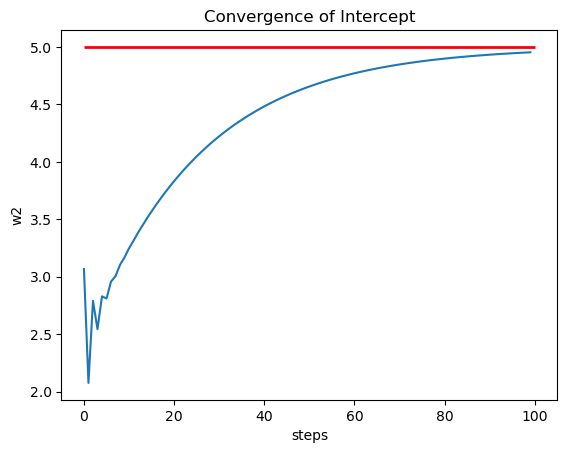

In [18]:
plt.plot(w2_list)
plt.title('Convergence of Intercept')
plt.xlabel('steps')
plt.ylabel('w2')
plt.hlines(y=w[1], xmin=0, xmax=100, linewidth=2, color='r')
plt.show()

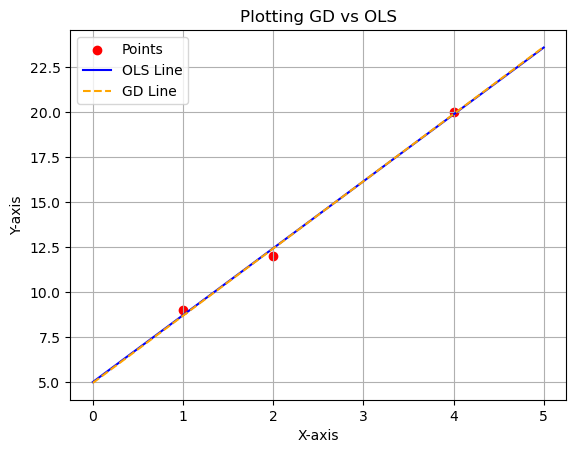

In [19]:
# Create the gradient descent line (yellow), and closed form (blue)
x_line = np.linspace(0, 5, 100) # generate 100 equally spaced points between 0 and 4

GD_y = w_gd[0]*x_line + w_gd[1]
OLS_y = w[0]*x_line + w[1]

plt.scatter(Phi[:,0], y, color = 'red', marker = 'o', label = 'Points')
#Create the line plots
plt.plot(x_line, OLS_y, linestyle='-', color='blue', label='OLS Line')
plt.plot(x_line, GD_y, linestyle='--', color='orange', label='GD Line')

# Labels and Legend and SHow
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting GD vs OLS')
plt.legend()

plt.grid(True)
plt.show()

In [20]:
# polynomial regression via OLS
Phi = np.array([[1, 1, 1],
                [4, 2, 1],
                [16, 4, 1],
                [25, 5, 1],
                [16, 4, 1]])
y = np.array([[9],
              [12],
              [20],
              [15],
              [14]])

In [21]:
y

array([[ 9],
       [12],
       [20],
       [15],
       [14]])

In [22]:
# closed-form
w = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), np.dot(Phi.T, y))
w

array([[-0.91666667],
       [ 7.25      ],
       [ 2.16666667]])

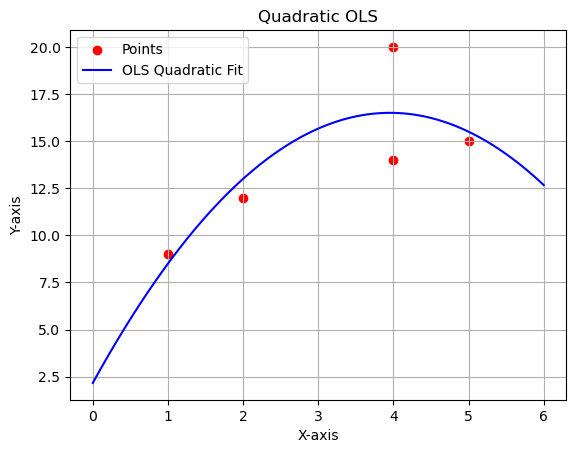

In [23]:
x_line = np.linspace(0, 6, 100) # generate 100 equally spaced points between 0 and 4

model_y = w[0]*x_line**2 + w[1]*x_line + w[2]

plt.scatter(Phi[:,1], y, color = 'red', marker = 'o', label = 'Points')
#Create the line plots
plt.plot(x_line, model_y, linestyle='-', color='blue', label='OLS Quadratic Fit')

# Labels and Legend and SHow
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Quadratic OLS')
plt.legend()

plt.grid(True)
plt.show()

In [24]:
# multivariate regression to predict work hours
y = onehotnp_gtky[:,1]
Phi = np.hstack((np.delete(X_scale, 1, axis=1), np.ones(X_scale.shape[0]).reshape(-1,1)))
y

array([12,  0, 15,  3,  0,  0,  5, 25,  8,  0,  0,  0,  5,  0, 12, 15,  0,
        0, 10, 10, 10,  0, 20,  0, 20,  0,  0])

**Explanation**
np.delete(X_scale, 1, axis=1)

1. np.delete() is used to remove elements from an array.

- X_scale is our scale matrix contain the information regarding students

- 1 is the index of the column to be removed (work hours)

- axis=1 means that we're deleting a column (not a row).

- This results in a new array that has all columns of X_scale except the second column (index 1).

2. np.ones(X_scale.shape[0]).reshape(-1,1)

- X_scale.shape[0] gives the number of rows in X_scale.
- np.ones(X_scale.shape[0]) creates a 1D array of ones with length equal to the number of rows in X_scale.
- .reshape(-1,1) reshapes it into a column vector (i.e., a 2D array with one column).

3. np.hstack((..., ...))

- np.hstack() horizontally stacks arrays (concatenates them side by side).
- It stacks the modified X_scale (without column 1) and the column of ones.
- This adds a bias term (intercept) to the dataset.


In [25]:
Phi

array([[0.83, 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ],
       [0.83, 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ],
       [0.83, 1.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.67, 1.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [0.67, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.83, 0.  , 0.  , 1.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [0.67, 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [0.83, 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.83, 1.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.67, 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [0.67, 1.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [0.83, 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [0.67, 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.67, 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  ],
       [0.67, 1.  , 0.  , 0.  ,

In [26]:
# fit the line
w = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), np.dot(Phi.T, y))
w

array([-0.86343319, -1.44582846, -1.590616  , -1.66400782,  6.79112028,
        5.68179395,  2.38065737])

**Breakout rooms: 4th Practice**

In [27]:
# getting the "full" polynomial feature map for a simple example
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[1, 2],
              [1, 4],
              [-3, 2],
              [0, 5],
              [-2, 0]])
# note that in X above, we have raw data; no intercept

poly = PolynomialFeatures(2)
Phi = poly.fit_transform(X)
Phi
# note that this puts the columns in a different order than we've done in the slides
# here the order is [1, x1, x2, x1^2, x1x2, x2^2]
# this is fine, just be careful

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  1.,  4.,  1.,  4., 16.],
       [ 1., -3.,  2.,  9., -6.,  4.],
       [ 1.,  0.,  5.,  0.,  0., 25.],
       [ 1., -2.,  0.,  4., -0.,  0.]])

**PolynomialFeatures**

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
